<a href="https://colab.research.google.com/github/Nilanjan-Chatterjee/Aahar/blob/main/LeNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import torch
import torchvision
import torchvision.transforms as transforms

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
transform = transforms.Compose(
    [transforms.Resize((32,32)),
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
batch_size=4
imagenet_data = torchvision.datasets.ImageFolder('/content/drive/MyDrive/train/',transform=transform)

trainloader = torch.utils.data.DataLoader(imagenet_data,
                                          batch_size=4,
                                          shuffle=True)
imagenet_data1 = torchvision.datasets.ImageFolder('/content/drive/MyDrive/test/',transform=transform)

testloader = torch.utils.data.DataLoader(imagenet_data1,
                                          batch_size=4,
                                          shuffle=True)
classes = ('carcinoma_in_situ', 'light_dysplastic', 'moderate_dysplastic', 'normal_columnar',
           'normal_intermediate', 'normal_superficial', 'severe_dysplastic')

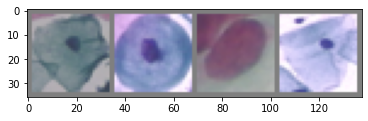

normal_intermediate normal_intermediate carcinoma_in_situ normal_superficial


In [6]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))


In [30]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 7)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
net = Net()
print("end")

end


In [31]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [32]:
print('Start Training')
for epoch in range(100):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 100== 99:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0

print('Finished Training')

Start Training
[1,   100] loss: 1.933
[2,   100] loss: 1.911
[3,   100] loss: 1.882
[4,   100] loss: 1.844
[5,   100] loss: 1.813
[6,   100] loss: 1.799
[7,   100] loss: 1.763
[8,   100] loss: 1.756
[9,   100] loss: 1.737
[10,   100] loss: 1.720
[11,   100] loss: 1.739
[12,   100] loss: 1.680
[13,   100] loss: 1.679
[14,   100] loss: 1.657
[15,   100] loss: 1.639
[16,   100] loss: 1.649
[17,   100] loss: 1.614
[18,   100] loss: 1.586
[19,   100] loss: 1.577
[20,   100] loss: 1.565
[21,   100] loss: 1.526
[22,   100] loss: 1.494
[23,   100] loss: 1.459
[24,   100] loss: 1.423
[25,   100] loss: 1.411
[26,   100] loss: 1.400
[27,   100] loss: 1.352
[28,   100] loss: 1.290
[29,   100] loss: 1.286
[30,   100] loss: 1.246
[31,   100] loss: 1.184
[32,   100] loss: 1.196
[33,   100] loss: 1.148
[34,   100] loss: 1.127
[35,   100] loss: 1.093
[36,   100] loss: 1.052
[37,   100] loss: 1.095
[38,   100] loss: 1.039
[39,   100] loss: 1.009
[40,   100] loss: 0.924
[41,   100] loss: 0.923
[42,   100

In [33]:
PATH = './conv.pth'
torch.save(net.state_dict(), PATH)

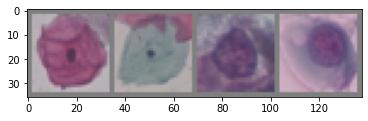

GroundTruth:  normal_superficial normal_superficial moderate_dysplastic light_dysplastic


In [34]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [35]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [36]:
outputs = net(images)

In [38]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:  normal_superficial normal_intermediate moderate_dysplastic moderate_dysplastic


In [39]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the  test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the  test images: 48 %


In [40]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print("Accuracy for class {:5s} is: {:.1f} %".format(classname,
                                                   accuracy))

Accuracy for class carcinoma_in_situ is: 57.7 %
Accuracy for class light_dysplastic is: 34.3 %
Accuracy for class moderate_dysplastic is: 40.7 %
Accuracy for class normal_columnar is: 42.1 %
Accuracy for class normal_intermediate is: 69.2 %
Accuracy for class normal_superficial is: 76.9 %
Accuracy for class severe_dysplastic is: 46.2 %
